In [3]:
!pip3 install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 11.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 13.8 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 19.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.9 MB/s eta 0:00:00a 0:00:01
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [4]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

# Local latency

In [5]:
import pickle
import os
from statistics import mean

local_latency_times = []
local_dir_path = "./pickles"

for filename in os.listdir(local_dir_path):# Iterate over each file in the directory
    if filename.endswith(".pkl"):# Check if the file is a pickle file
        file_path = os.path.join(local_dir_path, filename) # Construct the full file path
        with open(file_path, "rb") as f:# Load the data from the pickle file
            data = pickle.load(f)
            local_latency_times.append(data)

In [7]:
local_latency_times

[{'lookup_latency_0.2': 0.19842495800185134,
  'trade_buy_latency_0.2': 0.08079079100207309,
  'trade_sell_latency_0.2': 0.061486375001550186,
  'query_latency_0.2': 0.05199516649918223,
  'lookup_latency_0.4': 0,
  'trade_buy_latency_0.4': 0,
  'trade_sell_latency_0.4': 0,
  'query_latency_0.4': 0.050643750499148155,
  'lookup_latency_0.6': 0,
  'trade_buy_latency_0.6': 0,
  'trade_sell_latency_0.6': 0,
  'query_latency_0.6': 0.06703489600113244,
  'lookup_latency_0.8': 0.06850445799864247,
  'trade_buy_latency_0.8': 0.06692279200069606,
  'trade_sell_latency_0.8': 0.07755437499872642,
  'query_latency_0.8': 0.06658923950089957},
 {'lookup_latency_0.2': 0,
  'trade_buy_latency_0.2': 0,
  'trade_sell_latency_0.2': 0,
  'query_latency_0.2': 0,
  'lookup_latency_0.4': 0,
  'trade_buy_latency_0.4': 0,
  'trade_sell_latency_0.4': 0,
  'query_latency_0.4': 0,
  'lookup_latency_0.6': 0.17748513866536086,
  'trade_buy_latency_0.6': 0.06936518066504505,
  'trade_sell_latency_0.6': 0.0716013193

In [10]:
avg_lookup_latency_list = []
avg_buy_latency_list = []
avg_sell_latency_list = []
avg_query_latency_list = []
prob = [0.2, 0.4, 0.6, 0.8]
for p in prob:
    lookup_lat = []
    buy_lat = []
    sell_lat = []
    query_lat = []
    for every_client_data in local_latency_times:
        client_lookup = every_client_data[f"lookup_latency_{p}"]
        client_buy = every_client_data[f"trade_buy_latency_{p}"]
        client_sell = every_client_data[f"trade_sell_latency_{p}"]
        client_query = every_client_data[f"query_latency_{p}"]
        lookup_lat.append(client_lookup)
        buy_lat.append(client_buy)
        sell_lat.append(client_sell)
        query_lat.append(client_query)
    avg_lookup_latency_list.append(mean(lookup_lat))
    avg_buy_latency_list.append(mean(buy_lat))
    avg_sell_latency_list.append(mean(sell_lat))
    avg_query_latency_list.append(mean(query_lat))

In [16]:
avg_lookup_latency_list

[0.07745372500066879,
 0.09058915000059642,
 0.07557011386634258,
 0.04706830808847574]

In [17]:
avg_buy_latency_list

[0.03383370000083232,
 0.014336441599880345,
 0.045288175033056176,
 0.04341603615563751]

In [18]:
avg_sell_latency_list

[0.024903725000331178,
 0.012919291599973803,
 0.04297971936684917,
 0.04293753791110551]

In [19]:
avg_query_latency_list

[0.021544675099721643,
 0.020863466699665878,
 0.049146461223450996,
 0.05237557606566071]

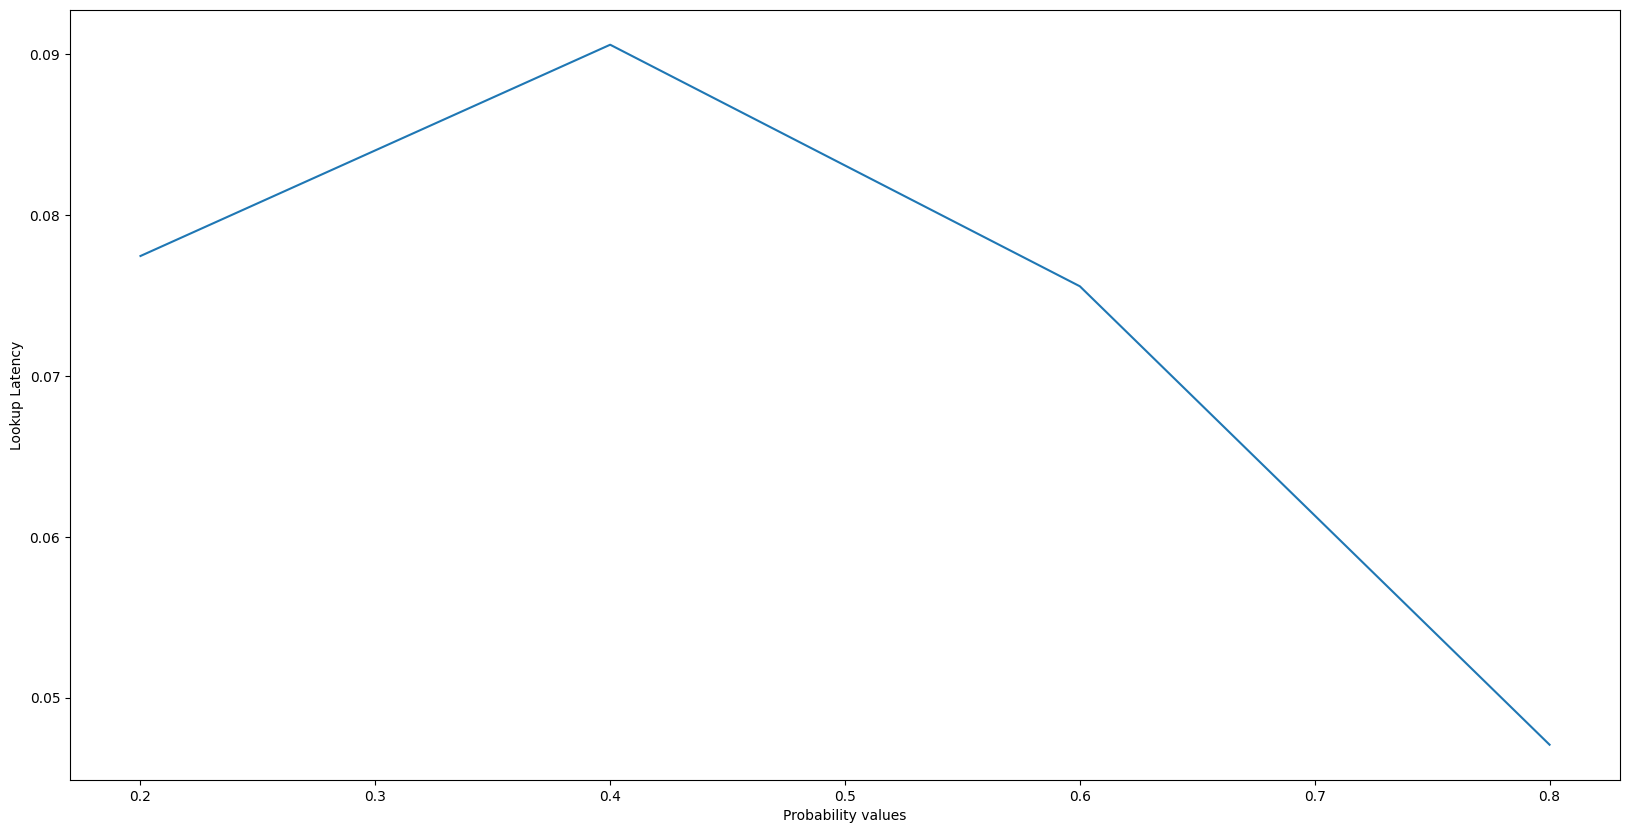

In [12]:
plt.plot(prob, avg_lookup_latency_list)
plt.xlabel("Probability values")
plt.ylabel("Lookup Latency")
plt.show()

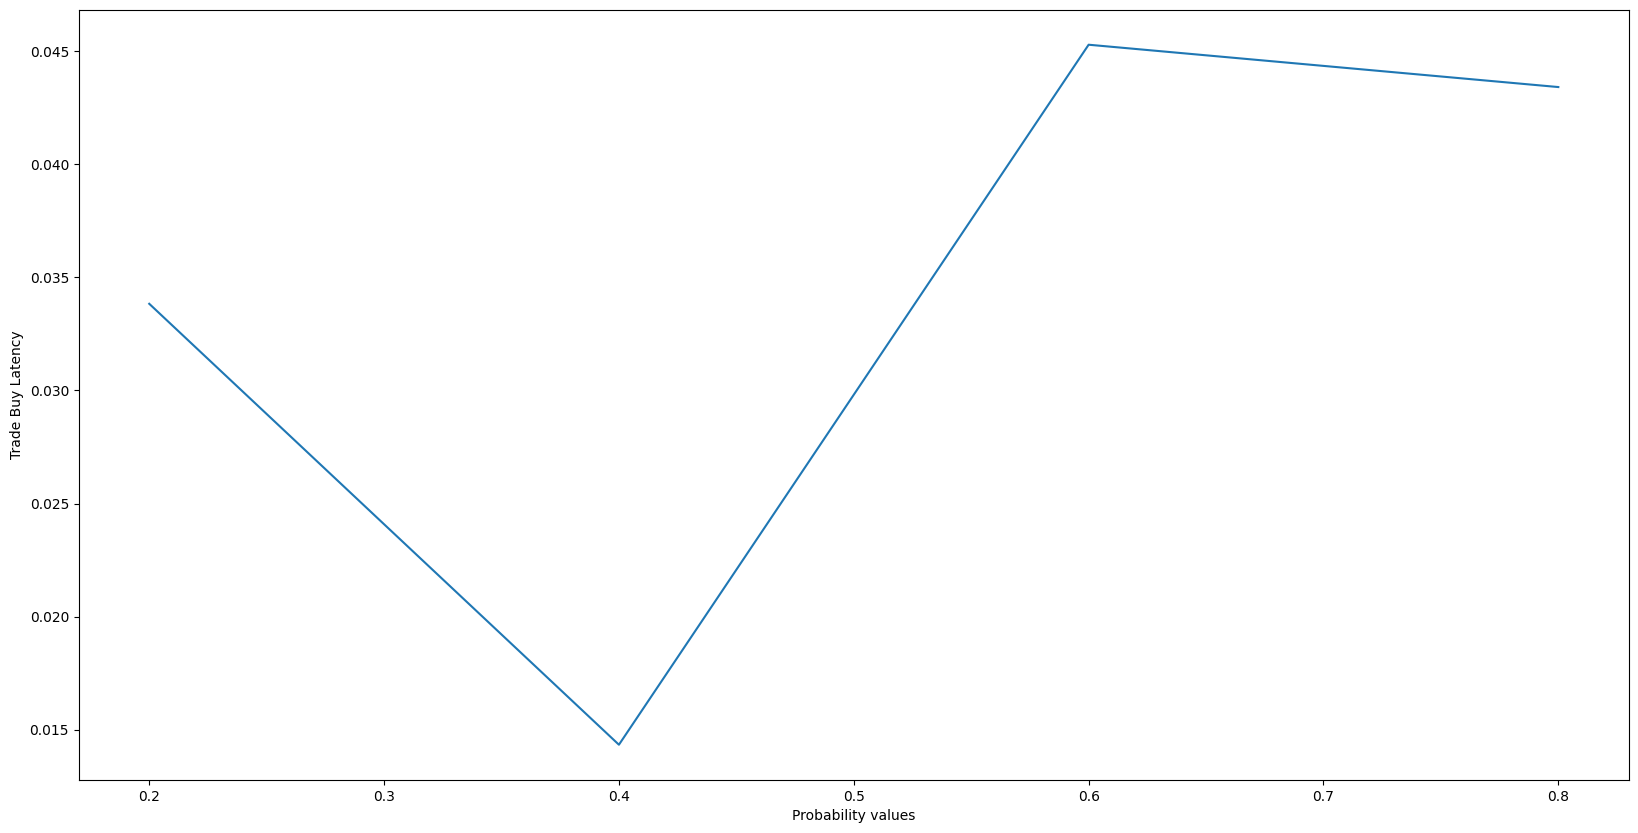

In [13]:
plt.plot(prob, avg_buy_latency_list)
plt.xlabel("Probability values")
plt.ylabel("Trade Buy Latency")
plt.show()

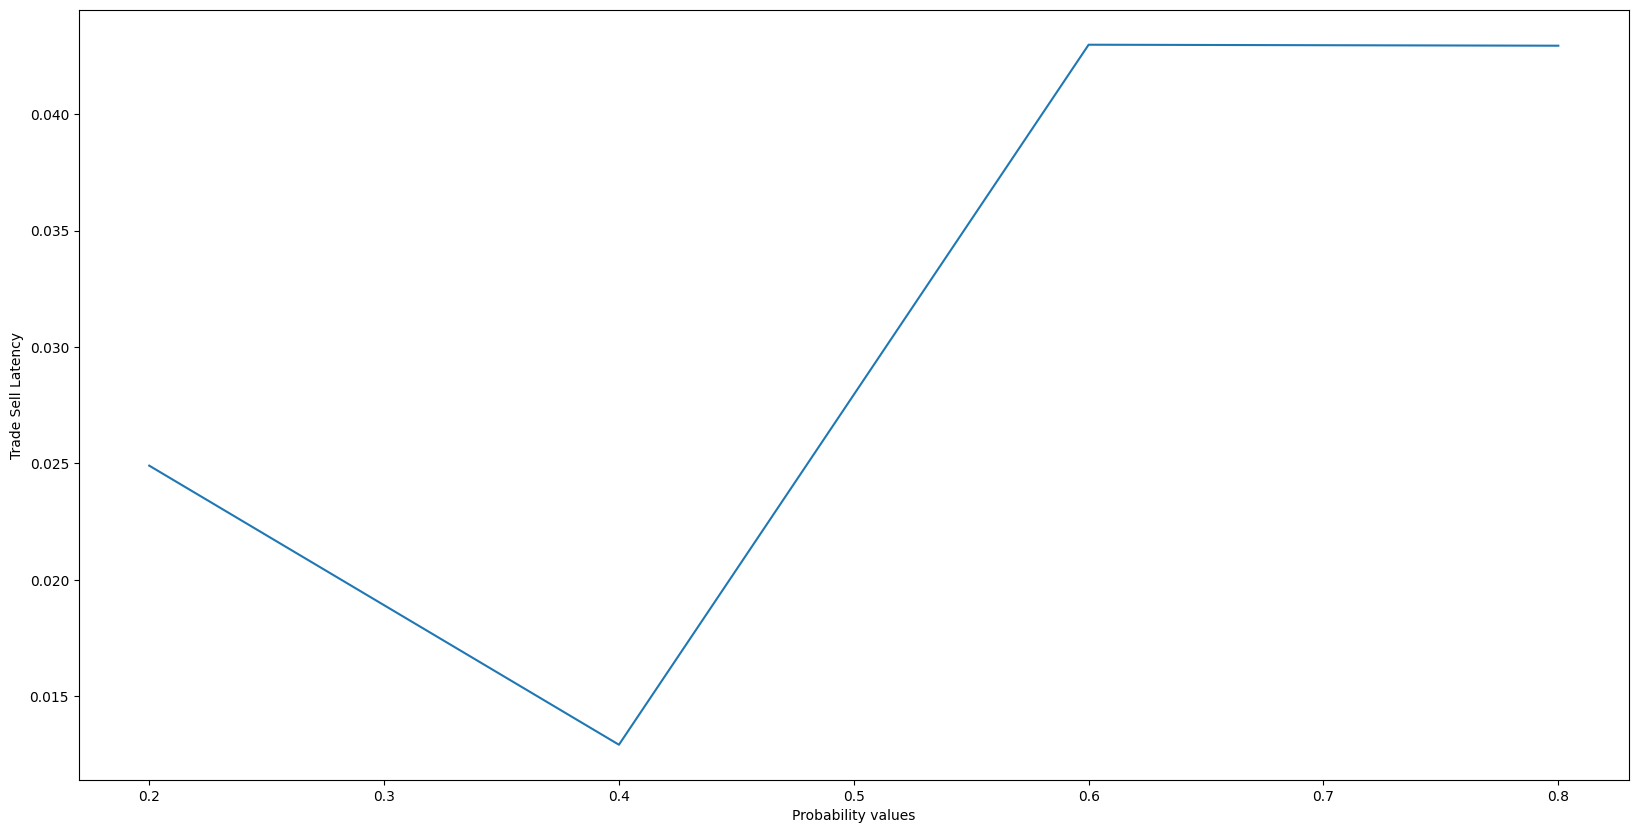

In [14]:
plt.plot(prob, avg_sell_latency_list)
plt.xlabel("Probability values")
plt.ylabel("Trade Sell Latency")
plt.show()

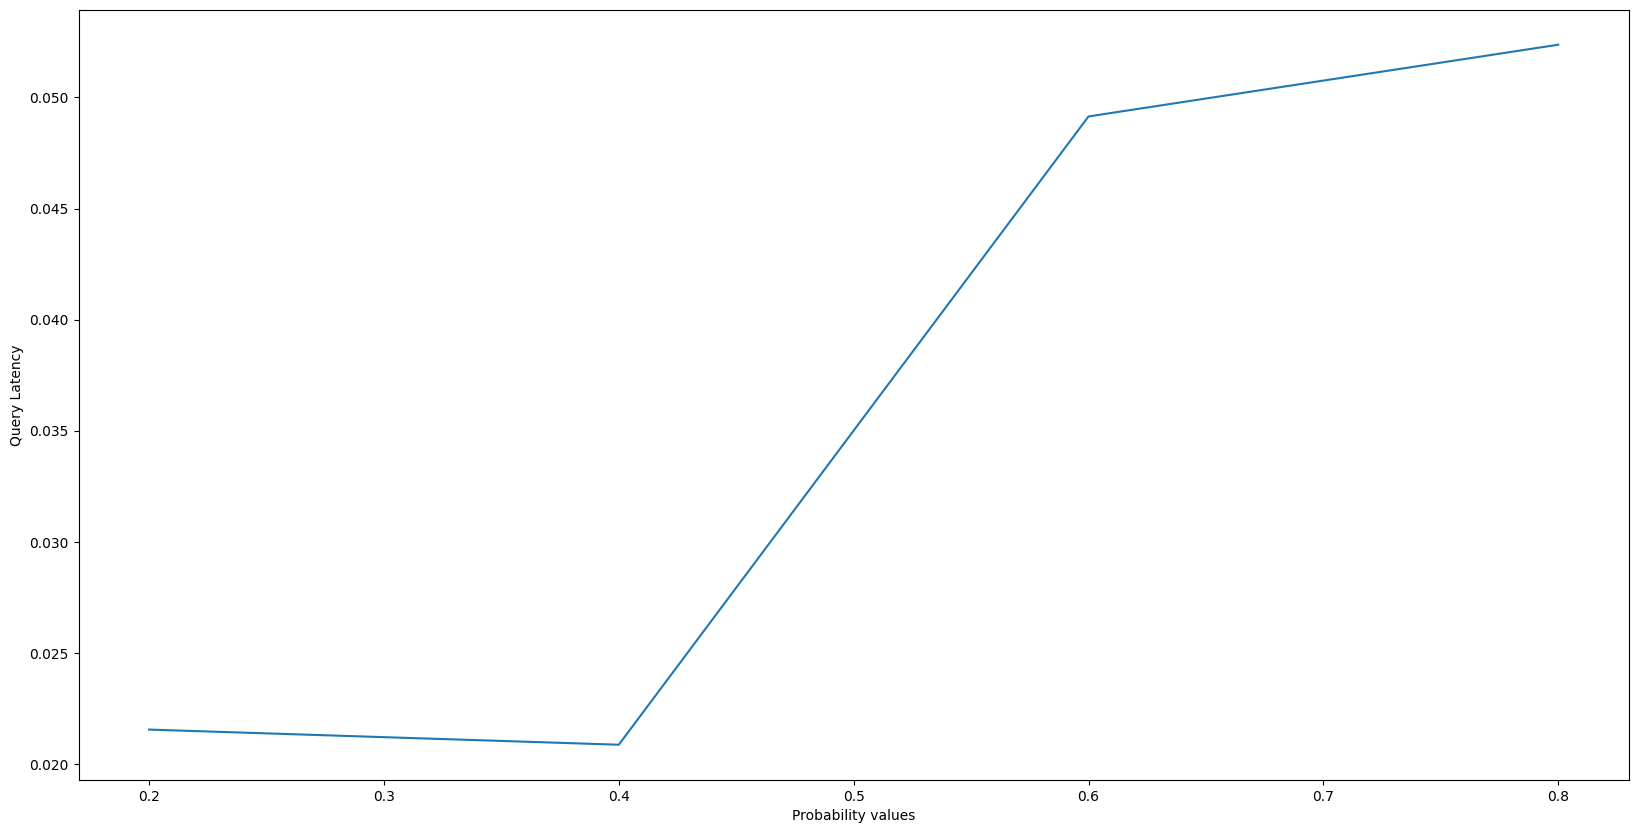

In [15]:
plt.plot(prob, avg_query_latency_list)
plt.xlabel("Probability values")
plt.ylabel("Query Latency")
plt.show()